## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [3]:
import tensorflow as tf
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/mnist.npz"

In [14]:
# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch,logs={}):
            if(logs.get('acc') >0.99):
                print("Reached 99% accuracy so cancelling training!")
                self.model.stop_training= True 

    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
    # YOUR CODE SHOULD START HERE
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    callbacks = myCallback()
    
    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
        
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(# YOUR CODE SHOULD START HERE
        x_train,y_train,epochs=10,callbacks=[callbacks]
              # YOUR CODE SHOULD END HERE
    )
    
    #This part is for testing purposes     
    plt.figure()
    f, axarr = plt.subplots(2,1) 
    axarr[0].imshow(x_test[4])
    axarr[1].imshow(x_test[5])
    print("y test[4] : " + str (y_test[4]))
    print("y test[5] :" + str (y_test[5]))
    #This part is for testing purposes
    
    # model fitting
    return history.epoch, history.history['acc'][-1]

Epoch 1/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.2018 - acc: 0.9402
Epoch 2/10
60000/60000 [==============================] - 13s 223us/sample - loss: 0.0815 - acc: 0.9751
y test[4]: 4
y test[5] :1


([0, 1], 0.97511667)

<Figure size 432x288 with 0 Axes>

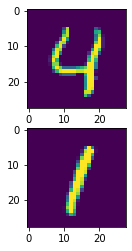

In [15]:
train_mnist()

In [13]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);

In [ ]:
model.evaluate(x_test, y_test)